<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/MLSST_lenet_64_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!nvidia-smi

Wed Aug 24 13:39:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.10-py3-none-any.whl size=15992 sha256=fc5917102b469f6211a4dee364fdea026da58ed8294c3bc3f7b145ef1cbe9644
  Stored in directory: /root/.cache/pip/wheels/33/b2/9d/97c264f6addbd178fe1c8ff119617e1515cb8c0d0f220605cf
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [5]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 523 (delta 167), reused 93 (delta 58), pack-reused 288
Receiving objects: 100% (523/523), 1.04 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [6]:
!cd bnn_hmc && git checkout dropout_wip

Branch 'dropout_wip' set up to track remote branch 'dropout_wip' from 'origin'.
Switched to a new branch 'dropout_wip'


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189.4 MB 21 kB/s 
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.14+cuda11.cudnn805
    Uninstalling jaxlib-0.3.14+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.14+cuda11.cudnn805
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590 kB 14.7 MB/s 
  Created wheel for jax: filename=jax-0.2.12-py3-none-any.whl size=682487 sha256=024daddf587869aadf17eb672137468a867ae5a4afca081dd42b2983f04cff36
  Stored in directory: /root/.cache/pip/wheels/f6/4d/e5/73eec5070b77f25664c67bd793d4eb97f41bbf9be7afafd15e
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [24]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [25]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/ \
--dataset_name=mlsst/Y10 --model_name=lenet_dropout --init_step_size=3e-7 --num_epochs=200 --eval_freq=5 \
--batch_size=100 --save_freq=5 --optimizer=SGD --patience 10 --test_split validation \
--dropout_rate 0.1 --image_size=64 --scaling asinh --subset_train_to=20000

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2022-08-24 14:52:41.959403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1154433024 exceeds 10% of free system memory.
tcmalloc: large alloc 1154433024 bytes == 0x20976000 @  0x7effbf6d4b6b 0x7effbf6f4379 0x7eff7206bfc7 0x7eff604a266f 0x7eff6053fd78 0x7eff6bc591d0 0x7eff6bc59763 0x7eff6d1ff1c2 0x7eff6066426b 0x7eff6d2d35c1 0x7eff660bd551 0x7eff660ba213 0x7eff60d9e515 0x7effbf0b66db 0x7effbf3ef61f
Starting from random initialization with provided seed
/content/bnn_hmc/bnn_hmc/utils/script_utils.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_sta

In [27]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/ \
--dataset_name=mlsst/Y10 --model_name=lenet_dropout --init_step_size=3e-7 --num_epochs=200 --eval_freq=5 \
--batch_size=100 --save_freq=5 --optimizer=SGD --patience 10 --eval_split test \
--dropout_rate 0.1 --image_size=64 --scaling asinh --repeats 10

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2022-08-24 15:30:13.609353: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1154433024 exceeds 10% of free system memory.
tcmalloc: large alloc 1154433024 bytes == 0x1c536000 @  0x7f4a1689cb6b 0x7f4a168bc379 0x7f49c9233fc7 0x7f49b766a66f 0x7f49b7707d78 0x7f49c2e211d0 0x7f49c2e21763 0x7f49c43c71c2 0x7f49b782c26b 0x7f49c449b5c1 0x7f49bd285551 0x7f49bd282213 0x7f49b7f66515 0x7f4a1627e6db 0x7f4a165b761f
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_sgd.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_set, key))
{'acc

In [28]:
softmax = []
for i, root in enumerate(glob.glob('/content/runs/sgd/mlsst/*/predictions*npy')):
  data = np.load(root.replace('predictions', 'test_set')) 
  prediction = np.load(root)
  metrics = np.load(root.replace('predictions', 'metrics'), allow_pickle=True)
  print(metrics)
  softmax.append(np.squeeze(prediction))
softmax = np.array(softmax)

{'accuracy': array(0.60491437, dtype=float32), 'nll': 0.89353424, 'ece': array(0.07420287, dtype=float32)}
{'accuracy': array(0.60268056, dtype=float32), 'nll': 0.88045216, 'ece': array(0.07444064, dtype=float32)}
{'accuracy': array(0.603723, dtype=float32), 'nll': 0.8933134, 'ece': array(0.07880723, dtype=float32)}
{'accuracy': array(0.6050633, dtype=float32), 'nll': 0.8900392, 'ece': array(0.07771396, dtype=float32)}
{'accuracy': array(0.59880865, dtype=float32), 'nll': 0.891691, 'ece': array(0.08004492, dtype=float32)}
{'accuracy': array(0.6014892, dtype=float32), 'nll': 0.8971248, 'ece': array(0.07997353, dtype=float32)}
{'accuracy': array(0.60789275, dtype=float32), 'nll': 0.8941127, 'ece': array(0.07390728, dtype=float32)}
{'accuracy': array(0.601936, dtype=float32), 'nll': 0.88756275, 'ece': array(0.07823691, dtype=float32)}
{'accuracy': array(0.6043187, dtype=float32), 'nll': 0.8961781, 'ece': array(0.0753431, dtype=float32)}
{'accuracy': array(0.6069993, dtype=float32), 'nll':

In [29]:
mean_softmax = np.mean(softmax, axis=0)
ensemble_accuracy = np.mean(np.argmax(mean_softmax, axis=-1) == data)
print('Ensemble accuracy', ensemble_accuracy)

Ensemble accuracy 0.6299329858525688


In [30]:
def uncertainty(softmax):
  # Per example softmax with shape(num_examples, num_classes)
  predictive_entropy = 0
  single_pass_entropy = 0
  for i in range(softmax.shape[1]):
    # Sum over classes
    predictive_entropy += -np.mean(softmax[:,i])*np.log(np.mean(softmax[:,i]))
    single_pass_entropy += -softmax[:,i]*np.log(softmax[:,i])
  single_pass_entropy = np.mean(single_pass_entropy)
  mutual_info = predictive_entropy - single_pass_entropy
  return predictive_entropy, single_pass_entropy, mutual_info

In [32]:
predictive_entropies = [] 
single_pass_entropies = []
mutual_infos = []
for i in range(softmax.shape[1]):
  predictive_entropy, single_pass_entropy, mutual_info = uncertainty(softmax[:,i,:])
  predictive_entropies.append(predictive_entropy)
  single_pass_entropies.append(single_pass_entropy)
  mutual_infos.append(mutual_info)
print('Predictive entropy:', np.mean(predictive_entropies), np.std(predictive_entropies))
print('Single pass entropy:', np.mean(single_pass_entropies), np.std(single_pass_entropies))
print('Mutual info:', np.mean(mutual_infos), np.std(mutual_infos))

Predictive entropy: 0.7784837075290597 0.29004131838329106
Single pass entropy: 0.7096751 0.28107408
Mutual info: 0.06880862090574216 0.045200938266472014


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


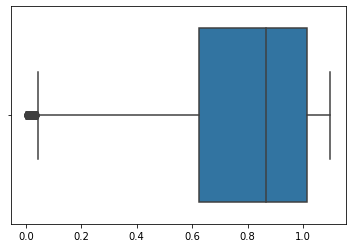

In [33]:
sns.boxplot(predictive_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


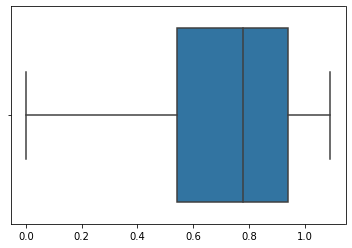

In [34]:
sns.boxplot(single_pass_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


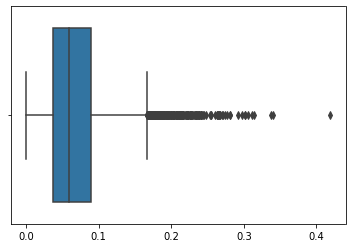

In [35]:
sns.boxplot(mutual_infos)
plt.show()